### Importando Arquivo e bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('canadian_immegration_data.csv')

In [3]:
df

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,161,140,122,133,128,211,160,174,217,2985
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,91,77,71,64,60,102,69,46,59,1677


### Exploração

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    195 non-null    object
 1   Continent  195 non-null    object
 2   Region     195 non-null    object
 3   DevName    195 non-null    object
 4   1980       195 non-null    int64 
 5   1981       195 non-null    int64 
 6   1982       195 non-null    int64 
 7   1983       195 non-null    int64 
 8   1984       195 non-null    int64 
 9   1985       195 non-null    int64 
 10  1986       195 non-null    int64 
 11  1987       195 non-null    int64 
 12  1988       195 non-null    int64 
 13  1989       195 non-null    int64 
 14  1990       195 non-null    int64 
 15  1991       195 non-null    int64 
 16  1992       195 non-null    int64 
 17  1993       195 non-null    int64 
 18  1994       195 non-null    int64 
 19  1995       195 non-null    int64 
 20  1996       195 non-null    int64

In [5]:
df.set_index('Country', inplace=True)

In [6]:
anos = list(map(str, range(1980,2014)))

In [7]:
brasil = df.loc['Brazil', anos]
brasil

1980     211
1981     220
1982     192
1983     139
1984     145
1985     130
1986     205
1987     244
1988     394
1989     650
1990     650
1991     877
1992    1066
1993     866
1994     566
1995     572
1996     586
1997     591
1998     531
1999     626
2000     845
2001     847
2002     745
2003     839
2004     917
2005     969
2006    1181
2007    1746
2008    2138
2009    2509
2010    2598
2011    1508
2012    1642
2013    1714
Name: Brazil, dtype: object

In [8]:
#ALTERNATIVA 1

#o dicionario serve para criar um df...
#primeiro é dado sempre o nome da coluna, e depois os dados
#os anos estão nos indice, quando quiser pegar dados que estão no indice, use a função .index
#a função tolist() serve para converter series numa lista, e os dados são em formato de lista
#o .values é aplicado a segunda coluna da series; obs: uma series só tem 2 colunas, é bidimensional.

#obs: é legal combinar o .index ao .values com o tolist, quando queremos fazer uma series virar um DF, se bem que usar o to_frame ou pd.DataFrame() é bem mais facil.
brasil_dict = {'ano': brasil.index.tolist(), 'imigrantes': brasil.values.tolist()}
dados_brasil = pd.DataFrame(brasil_dict)

In [9]:
#ALTERNATIVA 2

#COMO EU FARIA
brasil1 = brasil.to_frame().reset_index()
brasil1.rename(columns={'index': 'ano', 'Brazil': 'imigrantes'}, inplace=True)
brasil1

,ano,imigrantes
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145
5,1985,130
6,1986,205
7,1987,244
8,1988,394
9,1989,650


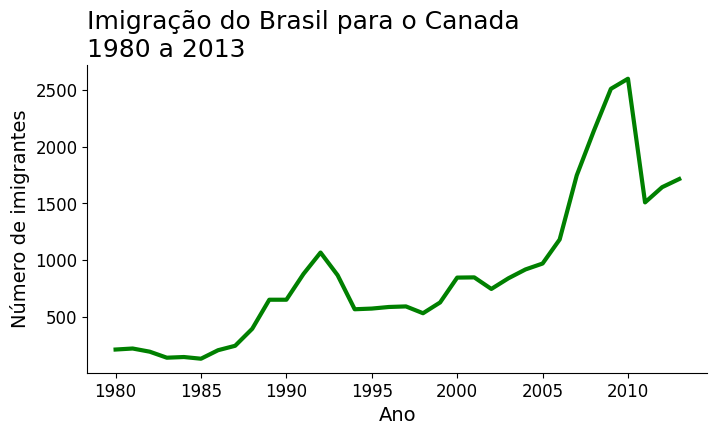

In [10]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dados_brasil.ano, dados_brasil.imigrantes, lw=3, color='g')
ax.set_title('Imigração do Brasil para o Canada\n1980 a 2013', fontsize=18, loc='left')
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig('imigracao_brasil_canada.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

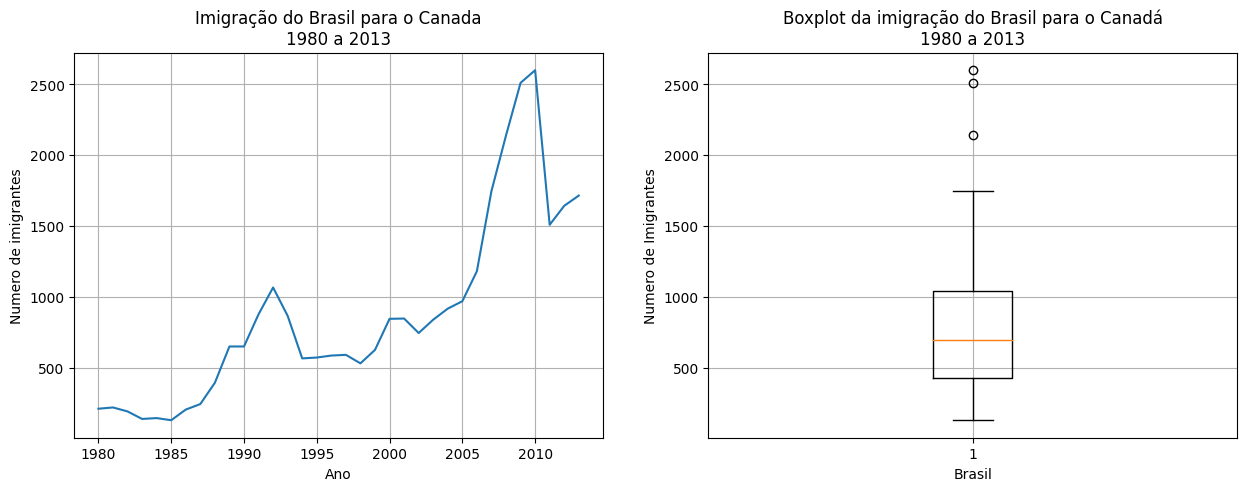

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].plot(dados_brasil.ano, dados_brasil.imigrantes)
axs[0].set_title('Imigração do Brasil para o Canada\n1980 a 2013')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Numero de imigrantes')
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5))
axs[0].grid()

axs[1].boxplot(dados_brasil['imigrantes'])
axs[1].set_title('Boxplot da imigração do Brasil para o Canadá\n1980 a 2013')
axs[1].set_xlabel('Brasil')
axs[1].set_ylabel('Numero de Imigrantes')
axs[1].grid()


plt.show()

In [12]:
dados_brasil.describe()

,imigrantes
count,34.000000
mean,872.323529
std,663.401232
min,130.000000
25%,428.250000
50%,697.500000
75%,1041.750000
max,2598.000000


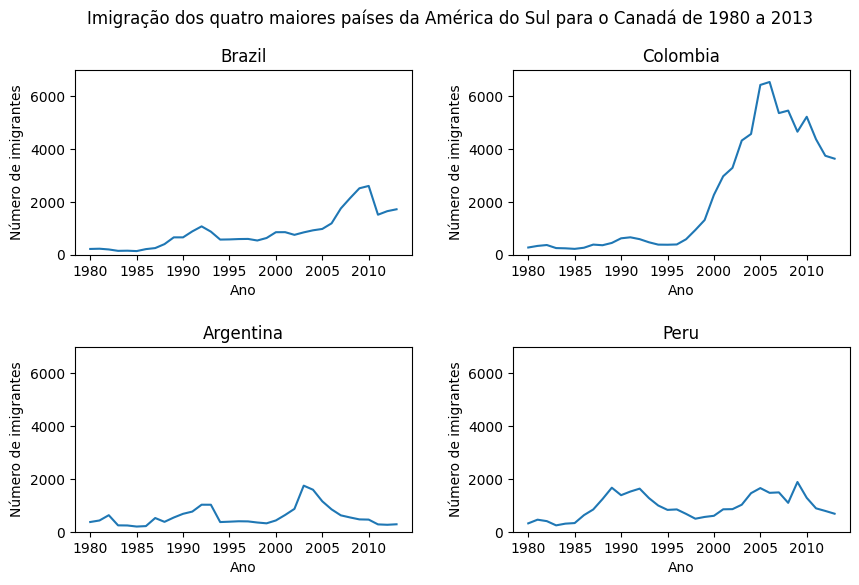

In [13]:
fig, axs = plt.subplots(2,2, figsize=(10,6))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle('Imigração dos quatro maiores países da América do Sul para o Canadá de 1980 a 2013')

# Código suprimido


axs[0,0].plot(df.loc['Brazil', anos])
axs[0,0].set_title('Brazil')

axs[0,1].plot(df.loc['Colombia', anos])
axs[0,1].set_title('Colombia')

axs[1,0].plot(df.loc['Argentina', anos])
axs[1,0].set_title('Argentina')

axs[1,1].plot(df.loc['Peru', anos])
axs[1,1].set_title('Peru')

for ax in axs.flat:
  ax.xaxis.set_major_locator(plt.MultipleLocator(5))

for ax in axs.flat:
  ax.set_xlabel('Ano')
  ax.set_ylabel('Número de imigrantes')

ymin = 0
ymax = 7000

for ax in axs.ravel():
  ax.set_ylim(ymin, ymax)

plt.show()

In [14]:
df.head(5)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [15]:
america_sul = df.query('(Region == "South America")')

In [16]:
america_sul_sorted = america_sul.sort_values('Total', ascending=True)

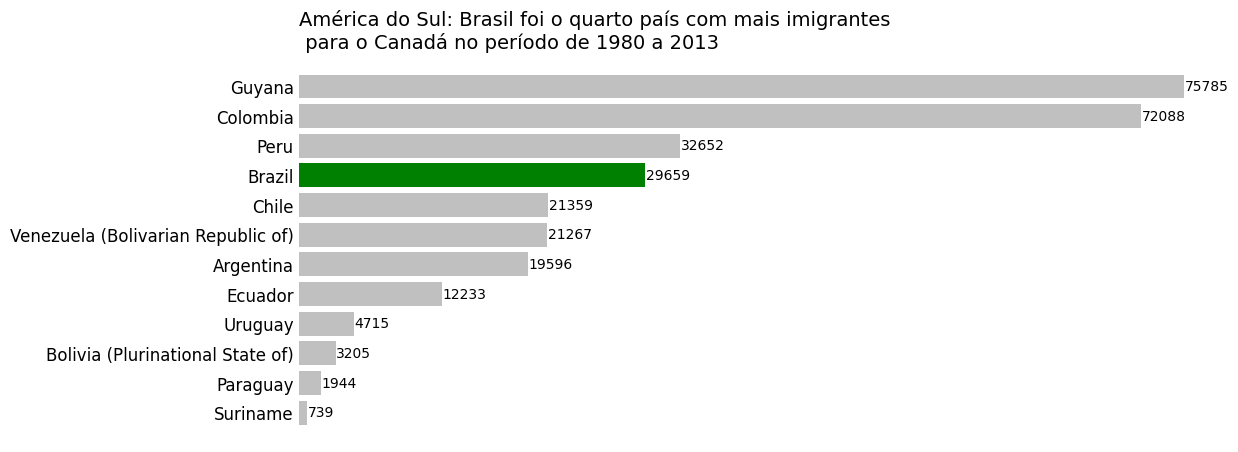

In [17]:
cores = []
for pais in america_sul_sorted.index:
  if pais == 'Brazil':
    cores.append('green')
  else:
    cores.append('silver')

fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color=cores)
ax.set_title('América do Sul: Brasil foi o quarto país com mais imigrantes\n para o Canadá no período de 1980 a 2013', loc='left', fontsize=14)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

for i, v in enumerate(america_sul_sorted.Total):
  ax.text(v + 20, i, str(v), color = 'black', fontsize=10, ha='left', va='center')

ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

fig.savefig('imigracao_america_sul.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

In [18]:
print(fig.canvas.get_supported_filetypes())

{'eps': 'Encapsulated Postscript', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'ps': 'Postscript', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format', 'webp': 'WebP Image Format'}


In [19]:
import seaborn as sns

In [20]:
sns.set_theme()

In [21]:
top_10 = df.sort_values('Total', ascending=False).head(10)
top_10

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [22]:
def gerar_grafico_paleta(palette):
  fig, ax = plt.subplots(figsize=(8,4))
  ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette=palette)
  ax.set_title('Países com maior imigração para o Canadá\n1980 a 2013')
  ax.set_xlabel('Número de imigrantes', fontsize=14)
  ax.set_ylabel('')

  plt.show()

<ipython-input-22-a651bafaf48f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette=palette)


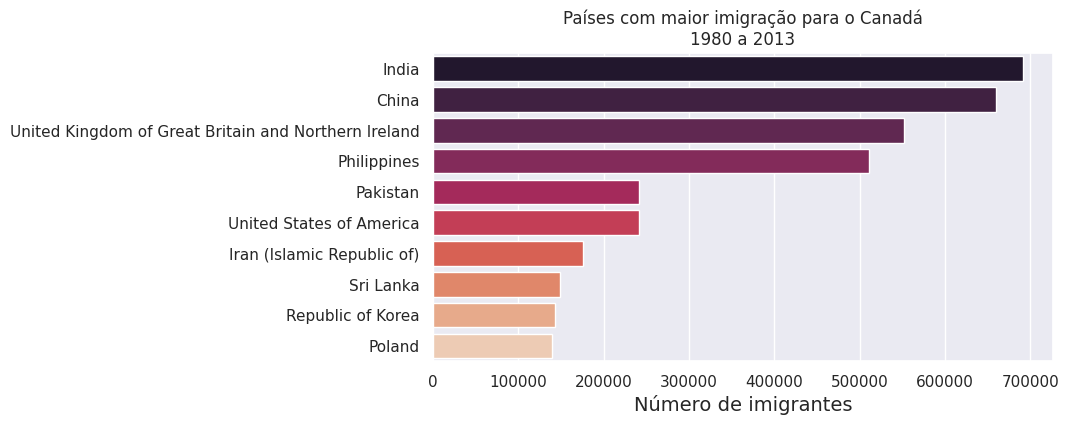

In [23]:
gerar_grafico_paleta('rocket')

<ipython-input-24-2b1798108ab6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette='tab10')


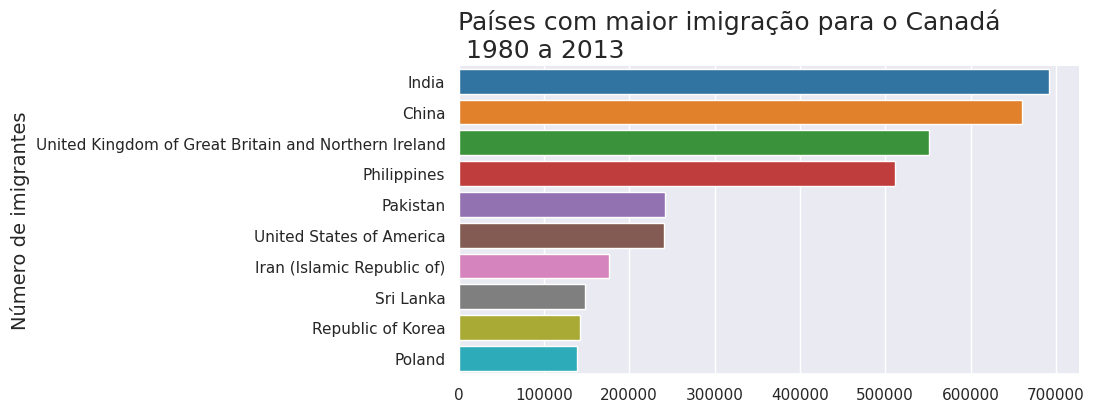

In [24]:
fig, ax= plt.subplots(figsize=(8,4))
ax=sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette='tab10')

ax.set_title('Países com maior imigração para o Canadá\n 1980 a 2013', loc='left', fontsize=18)
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.set_xlabel('')
sns.despine()

plt.show()

In [25]:
import plotly.express as px
fig = px.line(dados_brasil, x='ano', y='imigrantes', title='Imigração do Brasil para o Canadá no período de 1980 a 2013')
fig.update_traces(line_color='green', line_width=4)
fig.update_layout(width=1000, height=500,
                  xaxis={'tickangle': -45},
                  font_family='Arial',
                  font_size=14,
                  font_color='grey',
                  title_font_color='black',
                  title_font_size=22,
                  xaxis_title='Ano',
                  yaxis_title='Número de imigrantes')
fig.show()


In [26]:
america_sul.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,213,...,1153,847,620,540,467,459,278,263,282,19596
Bolivia (Plurinational State of),Latin America and the Caribbean,South America,Developing regions,44,52,42,49,38,44,79,...,134,139,107,143,214,180,86,83,107,3205
Brazil,Latin America and the Caribbean,South America,Developing regions,211,220,192,139,145,130,205,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Chile,Latin America and the Caribbean,South America,Developing regions,1233,1069,1078,781,681,533,633,...,384,427,530,350,375,340,174,291,273,21359
Colombia,Latin America and the Caribbean,South America,Developing regions,266,326,360,244,235,214,257,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088


In [27]:
df_america_sul_clean = america_sul.drop(['Continent', 'Region', 'Total'], axis=1)
america_sul_final = df_america_sul_clean.T

In [28]:
america_sul_final.head()

Country,Argentina,Bolivia (Plurinational State of),Brazil,Chile,Colombia,Ecuador,Guyana,Paraguay,Peru,Suriname,Uruguay,Venezuela (Bolivarian Republic of)
DevName,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions
1980,368,44,211,1233,266,238,2334,45,317,15,128,103
1981,426,52,220,1069,326,207,2943,26,456,10,132,117
1982,626,42,192,1078,360,184,3575,32,401,21,146,174
1983,241,49,139,781,244,155,2650,40,241,12,105,124


In [29]:
fig = px.line(america_sul_final, x=america_sul_final.index, y=america_sul_final.columns, color='Country',
              title='Imigração dos países da América do Sul para o Canadá de 1980 a 2013', markers=True)

fig.update_layout(
    xaxis={'tickangle': -45},
    xaxis_title='Ano',
    yaxis_title='Número de imigrantes'
)

fig.show()

In [30]:
fig.write_html('imigracao_america_sul.html')
